# Qubit growth vs PC flags

In [174]:
pc_flags_nids = []

file = open("../../../32fsm/12bad_c_lin.btor2", "r")

for line in file.readlines():
    elements = line.split()
    if len(elements) > 0:
        if "pc=" in elements[-1]:
            pc_flags_nids.append(int(elements[0]))
file.close()

In [42]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
gubit_growth_df = pd.read_csv("./qubit_growth.csv")

In [177]:
gubit_growth_df

,file,n,qubits
0,32_12bad_const,1,0
1,32_12bad_const,2,8
2,32_12bad_const,3,0
3,32_12bad_const,4,0
4,32_12bad_const,5,0
...,...,...,...
3195,64_12bad_c_mmu,76,24962
3196,64_12bad_c_mmu,77,32440
3197,64_12bad_c_mmu,78,30871
3198,64_12bad_c_mmu,79,31904


In [43]:
import sys
sys.path.append("../")
from instructions import Instruction
from btor2bqm import BTor2BQM


In [179]:
timesteps = [x for x in range(0,81)]

parser = BTor2BQM(80)
#
bqm = parser.parse_file(f"../../../32fsm/12bad_c_lin.btor2",
                  f"./temp/",
                  with_init=True, modify_memory_sort=True)
qubits_to_fix = Instruction.qubits_to_fix
qubit_nids = []
for timestep in range(0, 81):
    temp = []
    for nid in pc_flags_nids:
        qubit_name = Instruction.created_states_ids[nid][timestep][0]
        if qubit_name in qubits_to_fix.keys():
            temp.append(nid)
    qubit_nids.append(len(pc_flags_nids) - len(temp))

print(qubit_nids)

started building ../../../32fsm/12bad_c_lin.btor2 for 80 timesteps
{'begin_datasegment': 17408, 'begin_heap': 18432, 'size_datasegment': 2, 'size_heap': 1, 'size_stack': 9, 'word_size': 32, 'address_step_size': 1, 'address_word_size': 30, 'begin_stack': 1073741824}
output dir:  ./temp/
sort memory modified to be bitvector of size:  384
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 7, 7, 7, 6, 6, 5, 5, 5, 7, 7, 7, 7, 6, 6, 5, 5, 5, 7, 7, 7, 7, 6, 6, 5, 5, 5, 7, 7, 7, 7, 6, 6, 5, 5, 5, 7, 7, 7, 7, 6]


In [180]:
df = pd.DataFrame(list(zip(timesteps, qubit_nids)),
               columns =['timestep', 'active_flags'])

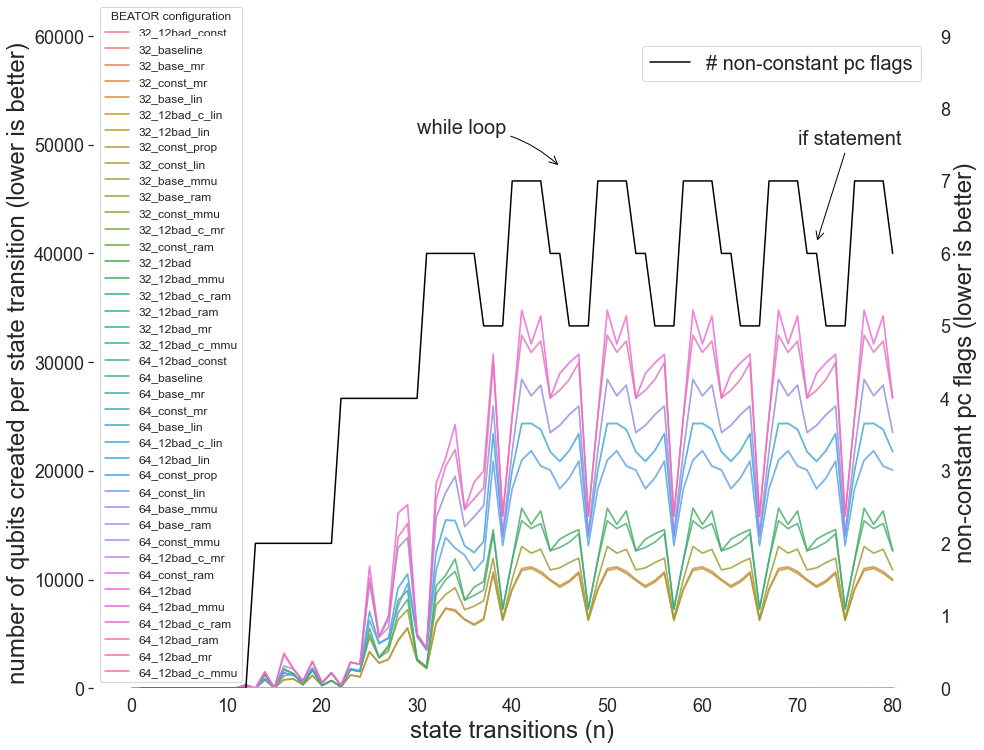

In [208]:
#Create combo chart
sb.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#plt.rcParams.update({'font.size': 22})
fig, ax1 = plt.subplots(figsize=(15,12))
#bar plot creation
ax1.set_xlabel('state transitions (n)', fontsize=24)
ax1.set_ylabel('number of qubits created per state transition (lower is better)', fontsize=24)
ax1 = sb.lineplot(data=gubit_growth_df, x="n", y="qubits", hue="file",alpha  = 0.6)
ax1.legend(title='BEATOR configuration', fontsize=12)
ax1.set(ylim=(0, 60000))
ax1.tick_params(axis='both', labelsize=18)
#specify we want to share the same x-axis
ax2 = ax1.twinx()

#line plot creation
ax2.set_ylabel('non-constant pc flags (lower is better)', fontsize=24)
ax2 = sb.lineplot(data=df, x="timestep", y="active_flags", color="black")
plt.tick_params(right = False)
ax2.legend(labels=['# non-constant pc flags'], fontsize=20)
ax2.set(ylim=(0, 9))
ax2.tick_params(axis='both', labelsize=18)
ax1.grid(False)
ax2.grid(False)

ax1.annotate("while loop", xy=(45, 48000),
            xytext=(30, 51000),xycoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2", color="black"), fontsize=20)

ax1.annotate("if statement", xy=(72, 41000),
            xytext=(70, 50000),xycoords='data',
            arrowprops=dict(arrowstyle="->", color="black"), fontsize=20)
#show plot
plt.show()

# Visualization

In [60]:
parser = BTor2BQM(15)
#
bqm = parser.parse_file(f"../../../qa_examples/32_u.btor2",
                  f"./temp/",
                  with_init=True, modify_memory_sort=True)
bqm = Instruction.bqm
print(len(bqm.variables))

started building ../../../qa_examples/32_u.btor2 for 15 timesteps
{'begin_datasegment': 17408, 'begin_heap': 18432, 'size_datasegment': 2, 'size_heap': 1, 'size_stack': 12, 'word_size': 32, 'address_step_size': 1, 'address_word_size': 30, 'begin_stack': 1073741824}
output dir:  ./temp/
sort memory modified to be bitvector of size:  480
348


In [61]:
import json
with open(f"./temp/context.json") as json_file:
    context = json.load(json_file)
    input_variables = context["input"][0]
    bad_states = context["bad_states"]

In [62]:
register_qubits = []

for r in range(200, 232):
    if r in Instruction.created_states_ids.keys():
        for i in range(16):
            try:
                for q in Instruction.created_states_ids[r][i]:
                    register_qubits.append(q)
            except:
                pass

In [63]:
import dimod

In [64]:
bqm_graph = dimod.to_networkx_graph(bqm)

In [65]:
import networkx as nx
from matplotlib.pyplot import figure

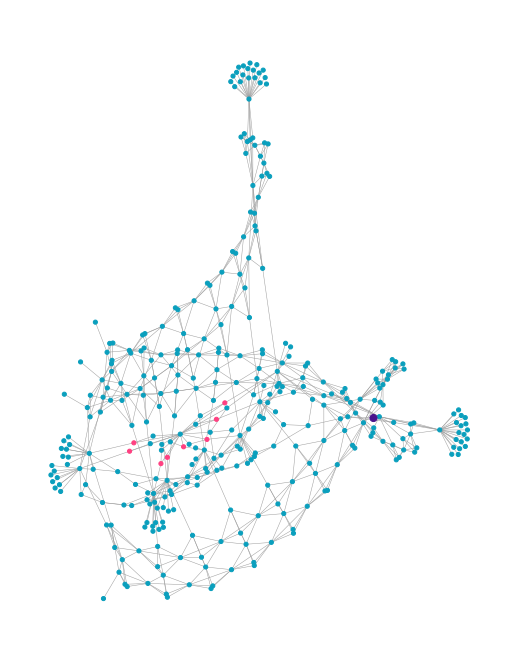

In [72]:
figure(figsize=(7, 9))
node_colors = []
node_sizes = []
a = []
for node in bqm_graph.nodes:
    if node in input_variables:
        node_colors.append("#ff4081")
        node_sizes.append(17)
#     if node in register_qubits:
#         node_colors.append("#7cb342")
#         node_sizes.append(17)
#         a.append(node)
    elif node in bad_states:
        node_colors.append("#4a148c")
        node_sizes.append(50)
    else:
        node_colors.append("#0a9fbd")
        node_sizes.append(17)
nx.draw(bqm_graph, node_size=node_sizes, width=0.5, node_color=node_colors, edge_color="#9e9e9e")

In [173]:
for i in input_variables:
    assert i in memory_qubits

In [10]:
parser = BTor2BQM(15)
#
bqm = parser.parse_file(f"../../../qa_examples/64_u.btor2",
                  f"./temp/",
                  with_init=True, modify_memory_sort=True)
bqm = Instruction.bqm
print(len(bqm.variables))

started building ../../../qa_examples/64_u.btor2 for 15 timesteps
{'begin_datasegment': 8704, 'begin_heap': 9216, 'size_datasegment': 2, 'size_heap': 1, 'size_stack': 10, 'word_size': 64, 'address_step_size': 1, 'address_word_size': 29, 'begin_stack': 536870912}
output dir:  ./temp/
sort memory modified to be bitvector of size:  832
398


In [13]:
print(len(node_sizes))
print(len(node_colors))

406
406


In [18]:
len(bqm.variables)

398